In [2]:
import pandas as pd
import numpy as np

from libs.simple_processing import separate_target

DATA = pd.read_csv('xor.csv', delimiter=';')

X, y = separate_target(DATA, 'y')

print(X.shape)
print('y:', y.shape)


(4, 2)
y: (4,)


In [17]:
print(X.head())
print(y.head())

   x1  x2
0   0   0
1   0   1
2   1   0
3   1   1
0    0
1    1
2    1
3    0
Name: y, dtype: int64


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# patience below 7 cuts to early
early_stopping = EarlyStopping(
    min_delta=0.0005,  # minimium amount of change to count as an improvement
    patience=7,  # how many epochs to wait before stopping
    restore_best_weights=True,
)
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=40)

X_train = X.copy()
y_train = y.copy()
X_valid = X.copy()
y_valid = y.copy()

input_shape = [X_train.shape[1]]
print(input_shape)
print(X_train.shape)

[2]
(4, 2)


In [4]:
print(y_train)

0    0
1    1
2    1
3    0
Name: y, dtype: int64


In [11]:
from tensorflow import keras
from tensorflow.keras import layers
from ann_visualizer.visualize import ann_viz
from graphviz import Source
from keras.layers import Activation

# initially I got val loss 0.07 because Id column present. After removing it I got 0.13
# Then I experimented with optimizers, loss and activation functions and the number of layers and neurons and finally got it back to 0.0700

# activation_function = 'relu'
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects


def activation_function(tensor):
    print(tensor)
    return tf.math.round(tensor, name=None)

# get_custom_objects().update({'activation_function': Activation(activation_function)})
# activation=lambda x: x/5

model = keras.Sequential([
    layers.Dense(2, activation="relu", input_shape=input_shape),
    # layers.Dense(2, activation=activation_function, input_shape=input_shape),
    # layers.Dense(2, activation=lambda x: int(x), input_shape=input_shape),
    layers.Dense(6, activation="relu"),
    layers.Dense(1)
])

model.compile(
    # optimizer='adam',
    #  loss='mae',
    loss='mean_squared_error',
    # metrics=['accuracy']
    metrics=['binary_accuracy']
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=4,# grupy danych
    epochs=250,
    callbacks=[early_stopping]
)
# print(model.summary())

# ann_viz(model, title="XOR")
# graph = Source.from_file('network.gv')
# graph

history_df = pd.DataFrame(history.history)
print("Minimum Validation Loss: {:0.5f}".format(history_df['val_loss'].min()));

Epoch 1/250
1/1 [==============================] - ETA: 0s - loss: 0.1629 - binary_accuracy: 0.7500

2022-10-10 17:38:03.375871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 501ms/step - loss: 0.1629 - binary_accuracy: 0.7500 - val_loss: 0.1526 - val_binary_accuracy: 0.7500
Epoch 2/250
1/1 [==============================] - 0s 34ms/step - loss: 0.1526 - binary_accuracy: 0.7500 - val_loss: 0.1455 - val_binary_accuracy: 0.7500
Epoch 3/250
1/1 [==============================] - 0s 23ms/step - loss: 0.1455 - binary_accuracy: 0.7500 - val_loss: 0.1397 - val_binary_accuracy: 0.7500
Epoch 4/250
1/1 [==============================] - 0s 27ms/step - loss: 0.1397 - binary_accuracy: 0.7500 - val_loss: 0.1348 - val_binary_accuracy: 0.7500
Epoch 5/250
1/1 [==============================] - 0s 27ms/step - loss: 0.1348 - binary_accuracy: 0.7500 - val_loss: 0.1304 - val_binary_accuracy: 0.7500
Epoch 6/250
1/1 [==============================] - 0s 25ms/step - loss: 0.1304 - binary_accuracy: 0.7500 - val_loss: 0.1265 - val_binary_accuracy: 0.7500
Epoch 7/250
1/1 [==============================] - ETA: 0s - loss: 0.1265 - binary_accu

2022-10-10 17:38:03.622758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 24ms/step - loss: 0.1265 - binary_accuracy: 0.7500 - val_loss: 0.1228 - val_binary_accuracy: 0.7500
Epoch 8/250
1/1 [==============================] - 0s 23ms/step - loss: 0.1228 - binary_accuracy: 0.7500 - val_loss: 0.1194 - val_binary_accuracy: 0.7500
Epoch 9/250
1/1 [==============================] - 0s 27ms/step - loss: 0.1194 - binary_accuracy: 0.7500 - val_loss: 0.1162 - val_binary_accuracy: 0.7500
Epoch 10/250
1/1 [==============================] - 0s 22ms/step - loss: 0.1162 - binary_accuracy: 0.7500 - val_loss: 0.1132 - val_binary_accuracy: 0.7500
Epoch 11/250
1/1 [==============================] - 0s 24ms/step - loss: 0.1132 - binary_accuracy: 0.7500 - val_loss: 0.1103 - val_binary_accuracy: 0.7500
Epoch 12/250
1/1 [==============================] - 0s 28ms/step - loss: 0.1103 - binary_accuracy: 0.7500 - val_loss: 0.1076 - val_binary_accuracy: 0.7500
Epoch 13/250
1/1 [==============================] - 0s 26ms/step - loss: 0.1076 - bin

In [12]:
print(model.predict(np.array([[0, 1]])))


1/1 [==============================] - 0s 42ms/step
[[0.94824106]]


2022-10-10 17:38:10.263980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [18]:
from sklearn.neural_network._multilayer_perceptron import MLPClassifier
import numpy
from matplotlib.colors import ListedColormap

markers = ('*', '^', 'x')
colors = ('brown', 'green', 'yellow')
cmap = ListedColormap(colors)
# x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
# y_min, y_max = y_train[:, 0].min() - 1, y_train[:, 0].max() + 1

resolution = 0.01
# x, y = numpy.meshgrid(numpy.arange(x_min, x_max, resolution), numpy.arange(y_min, y_max, resolution))
Z = model.predict(numpy.array([X_train]))
Z = Z.reshape(X_train.shape)
plt.pcolormesh(X_train, y_train, Z, cmap=cmap)
plt.xlim(X_train.min(), X_train.max())
plt.ylim(y_train.min(), y_train.max())
classes = ["0", "1"]

for index, cl in enumerate(numpy.unique(y_train)):
    plt.scatter(X_train[y_train == cl, 0], X_train[y_train == cl, 1], c=cmap(index), marker=markers[index], s=50, label=classes[index])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.show()



2022-10-10 17:47:16.989210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/dense_3/MatMul' defined at (most recent call last):
    File "/Users/kkepins-macwro_1/.pyenv/versions/3.9.13/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/kkepins-macwro_1/.pyenv/versions/3.9.13/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/kkepins-macwro_1/.pyenv/versions/3.9.13/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/Users/kkepins-macwro_1/.pyenv/versions/3.9.13/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/Users/kkepins-macwro_1/.pyenv/versions/3.9.13/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/r3/hdngxsmd2vq391vqv6kg6f7w0000gq/T/ipykernel_96200/1679664756.py", line 13, in <cell line: 13>
      Z = model.predict(numpy.array([X_train]))
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/engine/training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/engine/training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/engine/training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/engine/training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/engine/training.py", line 1791, in predict_step
      return self(x, training=False)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/keras/layers/core/dense.py", line 221, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
Node: 'sequential_1/dense_3/MatMul'
In[0] and In[1] has different ndims: [1,4,2] vs. [2,2]
	 [[{{node sequential_1/dense_3/MatMul}}]] [Op:__inference_predict_function_16293]

weights:  [[-0.34849173  0.7927852   0.5323792  -0.91339725  0.7211224 ]
 [-0.20247483 -0.3839736   0.91132045  0.8482443   0.10412359]]
biases:  [ 0.         -0.00097036 -0.00096259  0.         -0.00097353]


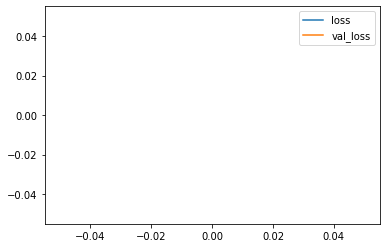

In [27]:
history_df.loc[109:, ['loss', 'val_loss']].plot()
weights = model.layers[1].get_weights()[0]
biases = model.layers[1].get_weights()[1]
print('weights: ', weights)
print('biases: ', biases)

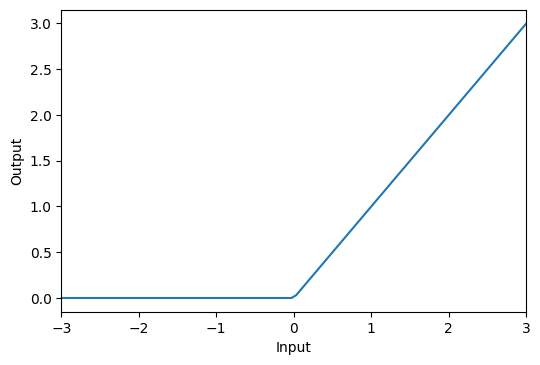

In [44]:
# Change 'relu' to 'elu', 'selu', 'swish'... or something else
# How different activation functions look like

import tensorflow as tf
import matplotlib.pyplot as plt

# print(tf.__version__)

activation_layer = layers.Activation('relu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x)  # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()